# Understanding the Russell Data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

In [2]:
# Load in the data files
daily_prices = pd.read_csv("russell_3k_updated/russell_3k_daily_prices.csv", index_col=0)

In [3]:
daily_prices.shape

(5705612, 8)

In [4]:
# Show all rows where the index is equal to 0 in daily_prices
daily_prices = daily_prices.loc[daily_prices.index < 1649]
daily_prices = daily_prices.loc[daily_prices.index > 2]
daily_prices

,Price,Adj Close,Close,High,Low,Open,Volume,Ticker
3,2015-06-22,26.611177444458008,28.259279251098633,28.595699310302734,28.0910701751709,28.595699310302734,10027258,AA
4,2015-06-23,26.5659236907959,28.211219787597656,28.427490234375,28.139129638671875,28.331369400024414,6852143,AA
5,2015-06-24,26.5659236907959,28.211219787597656,28.475549697875977,28.0910701751709,28.139129638671875,7503079,AA
6,2015-06-25,26.181238174438477,27.802709579467773,28.283309936523438,27.754650115966797,28.259279251098633,6462588,AA
7,2015-06-26,26.452777862548828,28.0910701751709,28.259279251098633,27.7786808013916,27.826740264892578,6763754,AA
...,...,...,...,...,...,...,...,...
1644,2021-12-27,9.422786712646484,9.527273178100586,9.909090995788574,9.472726821899414,9.836363792419434,298100,ZYXI
1645,2021-12-28,9.036165237426758,9.136363983154297,9.518181800842285,9.045454978942871,9.472726821899414,249260,ZYXI
1646,2021-12-29,8.964234352111816,9.06363582611084,9.163636207580566,8.836363792419434,9.145455360412598,314270,ZYXI
1647,2021-12-30,9.198006629943848,9.300000190734863,9.5,8.954545021057129,8.981818199157715,332200,ZYXI


In [5]:
daily_prices.head(5)

,Price,Adj Close,Close,High,Low,Open,Volume,Ticker
3,2015-06-22,26.611177444458008,28.259279251098633,28.595699310302734,28.0910701751709,28.595699310302734,10027258,AA
4,2015-06-23,26.5659236907959,28.211219787597656,28.427490234375,28.139129638671875,28.331369400024414,6852143,AA
5,2015-06-24,26.5659236907959,28.211219787597656,28.475549697875977,28.0910701751709,28.139129638671875,7503079,AA
6,2015-06-25,26.181238174438477,27.802709579467773,28.283309936523438,27.754650115966797,28.259279251098633,6462588,AA
7,2015-06-26,26.452777862548828,28.0910701751709,28.259279251098633,27.7786808013916,27.826740264892578,6763754,AA


In [6]:
num = 1643 + 1648
daily_prices.iloc[num : num + 5]

,Price,Adj Close,Close,High,Low,Open,Volume,Ticker
1648,2021-12-31,17.959999084472656,17.959999084472656,18.360000610351562,17.93000030517578,18.06999969482422,20657000,AAL
3,2015-06-22,16.938779830932617,18.43000030517578,18.540000915527344,18.1200008392334,18.34000015258789,615300,AAMI
4,2015-06-23,16.975542068481445,18.469999313354492,18.549999237060547,18.100000381469727,18.360000610351562,711300,AAMI
5,2015-06-24,16.617097854614258,18.079999923706055,18.4950008392334,18.06999969482422,18.3799991607666,233400,AAMI
6,2015-06-25,16.304603576660156,17.739999771118164,18.3799991607666,17.709999084472656,18.18000030517578,555400,AAMI


In [7]:
# Check the columns and structure of the data
print("Columns:", daily_prices.columns.tolist())

# Check the index (which should be dates)
print(f"\nIndex name: {daily_prices.index.name}")
print(f"Sample index values: {daily_prices.index[:5].tolist()}")

# Transform the dataframe: pivot so tickers are index, dates are columns, close prices are values
daily_prices_pivoted = daily_prices.pivot_table(
    index='Ticker',
    columns=daily_prices.index,  # Use the current index (dates) as columns
    values='Adj Close',
    aggfunc='first'  # In case there are any duplicates, take the first value
)

print(f"\nOriginal shape: {daily_prices.shape}")
print(f"Pivoted shape: {daily_prices_pivoted.shape}")
print(f"\nPivoted dataframe preview:")
daily_prices_pivoted.head()

Columns: ['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ticker']

Index name: None
Sample index values: [3, 4, 5, 6, 7]

Original shape: (4002224, 8)
Pivoted shape: (2632, 1646)

Pivoted dataframe preview:


,3,4,5,6,7,8,9,10,11,12,...,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648
Ticker,,,,,,,,,,,,,,,,,,,,,
A,36.674705505371094,36.48123550415039,37.0247802734375,36.89579772949219,36.960445404052734,35.77830123901367,35.63052749633789,36.258548736572266,36.55408477783203,36.350914001464844,...,147.80691528320312,146.8307342529297,150.28631591796875,153.03897094726562,154.03466796875,154.9522705078125,155.38172912597656,156.81663513183594,157.04116821289062,155.8404998779297
AA,26.611177444458008,26.5659236907959,26.5659236907959,26.181238174438477,26.452777862548828,25.683408737182617,25.230836868286133,25.049808502197266,25.117694854736328,24.959287643432617,...,51.748836517333984,51.15169906616211,54.696006774902344,57.12309646606445,57.17124938964844,57.623924255371094,57.00752639770508,57.43129348754883,57.02677917480469,57.383140563964844
AAL,40.937416076660156,40.652015686035156,40.18584060668945,40.18584060668945,39.42474365234375,37.816932678222656,37.9976921081543,36.91312789916992,37.13194274902344,37.79791259765625,...,16.950000762939453,17.299999237060547,18.1200008392334,18.260000228881836,18.260000228881836,18.170000076293945,18.540000915527344,18.049999237060547,18.06999969482422,17.959999084472656
AAMI,16.938779830932617,16.975542068481445,16.617097854614258,16.304603576660156,16.442472457885742,16.056453704833984,16.350563049316406,16.350563049316406,16.258647918701172,16.03807258605957,...,26.145063400268555,24.694217681884766,25.12152099609375,25.27058219909668,25.4991397857666,25.85688018798828,25.62832260131836,25.479263305664062,25.757509231567383,25.439510345458984
AAOI,18.010000228881836,17.989999771118164,19.200000762939453,19.1299991607666,18.709999084472656,17.329999923706055,17.360000610351562,18.06999969482422,17.059999465942383,17.059999465942383,...,5.670000076293945,5.380000114440918,5.46999979019165,5.460000038146973,5.639999866485596,5.590000152587891,5.480000019073486,5.300000190734863,5.349999904632568,5.139999866485596


In [8]:
# Assign the transformed data to a more convenient variable name
daily_prices_matrix = daily_prices_pivoted

# Show some key statistics about the transformed matrix
print("Transformed Daily Prices Matrix Summary:")
print(f"Number of tickers (rows): {daily_prices_matrix.shape[0]}")
print(f"Number of trading days (columns): {daily_prices_matrix.shape[1]}")
print(f"Date range: {daily_prices_matrix.columns.min()} to {daily_prices_matrix.columns.max()}")
print(f"Sample tickers: {daily_prices_matrix.index[:10].tolist()}")

# Check for missing values
missing_percentage = (daily_prices_matrix.isnull().sum().sum() / (daily_prices_matrix.shape[0] * daily_prices_matrix.shape[1])) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Transformed Daily Prices Matrix Summary:
Number of tickers (rows): 2632
Number of trading days (columns): 1646
Date range: 3 to 1648
Sample tickers: ['A', 'AA', 'AAL', 'AAMI', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAT', 'ABBV']
Percentage of missing values: 7.62%


In [9]:
daily_prices_pivoted

,3,4,5,6,7,8,9,10,11,12,...,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648
Ticker,,,,,,,,,,,,,,,,,,,,,
A,36.674705505371094,36.48123550415039,37.0247802734375,36.89579772949219,36.960445404052734,35.77830123901367,35.63052749633789,36.258548736572266,36.55408477783203,36.350914001464844,...,147.80691528320312,146.8307342529297,150.28631591796875,153.03897094726562,154.03466796875,154.9522705078125,155.38172912597656,156.81663513183594,157.04116821289062,155.8404998779297
AA,26.611177444458008,26.5659236907959,26.5659236907959,26.181238174438477,26.452777862548828,25.683408737182617,25.230836868286133,25.049808502197266,25.117694854736328,24.959287643432617,...,51.748836517333984,51.15169906616211,54.696006774902344,57.12309646606445,57.17124938964844,57.623924255371094,57.00752639770508,57.43129348754883,57.02677917480469,57.383140563964844
AAL,40.937416076660156,40.652015686035156,40.18584060668945,40.18584060668945,39.42474365234375,37.816932678222656,37.9976921081543,36.91312789916992,37.13194274902344,37.79791259765625,...,16.950000762939453,17.299999237060547,18.1200008392334,18.260000228881836,18.260000228881836,18.170000076293945,18.540000915527344,18.049999237060547,18.06999969482422,17.959999084472656
AAMI,16.938779830932617,16.975542068481445,16.617097854614258,16.304603576660156,16.442472457885742,16.056453704833984,16.350563049316406,16.350563049316406,16.258647918701172,16.03807258605957,...,26.145063400268555,24.694217681884766,25.12152099609375,25.27058219909668,25.4991397857666,25.85688018798828,25.62832260131836,25.479263305664062,25.757509231567383,25.439510345458984
AAOI,18.010000228881836,17.989999771118164,19.200000762939453,19.1299991607666,18.709999084472656,17.329999923706055,17.360000610351562,18.06999969482422,17.059999465942383,17.059999465942383,...,5.670000076293945,5.380000114440918,5.46999979019165,5.460000038146973,5.639999866485596,5.590000152587891,5.480000019073486,5.300000190734863,5.349999904632568,5.139999866485596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZUMZ,27.290000915527344,28.059999465942383,27.649999618530273,27.709999084472656,27.649999618530273,26.450000762939453,26.6299991607666,26.93000030517578,26.65999984741211,26.81999969482422,...,44.779998779296875,42.61000061035156,44.459999084472656,45.119998931884766,45.900001525878906,47.77000045776367,47.56999969482422,48.130001068115234,48.33000183105469,47.9900016784668
ZVRA,312.9599914550781,312.1600036621094,292.9599914550781,292.6400146484375,302.7200012207031,292.9599914550781,293.9200134277344,284.79998779296875,284.6400146484375,280.4800109863281,...,7.78000020980835,8.3100004196167,8.899999618530273,8.8100004196167,8.970000267028809,9.3100004196167,8.579999923706055,9.079999923706055,8.970000267028809,8.710000038146973
ZWS,25.137914657592773,24.540536880493164,24.318933486938477,23.972064971923828,23.50958251953125,22.59425163269043,23.03746795654297,23.1723575592041,22.873666763305664,22.671335220336914,...,33.828731536865234,33.05483627319336,34.35110855102539,34.79609298706055,34.89282989501953,35.279788970947266,35.46358108520508,35.53129196166992,35.05728530883789,35.21206283569336


In [15]:
daily_prices_pivoted.to_csv("/yunity/arusty/PF-GAP/data/russell3000.csv", index = True)

# Fundamentals Dataset
- These might be the Static Variables

In [10]:
# load in the fundamentals file
fundamentals = pd.read_csv("russell_3k_updated/russell_3k_fundamentals.csv", index_col=0)
fundamentals.shape

(6850, 15)

In [11]:
fundamentals.head(10)

,Ticker,Year,MarketCap,TrailingPE,PriceToBook,PriceToSales,ReturnOnEquity,ReturnOnAssets,DebtToEquity,CurrentRatio,ProfitMargin,EpsGrowth5Y,RevenueGrowth,EpsGrowthYoY,Unnamed: 0
0,AA,2024,9.259132e+09,154.318868,1.795449,0.778405,0.011635,0.004266,1.727167,NaN,0.005044,NaN,NaN,NaN,NaN
1,AA,2023,8.118999e+09,-12.471581,1.909903,0.769500,-0.153140,-0.045991,2.329805,NaN,-0.061700,NaN,-0.112989,-11.850000,NaN
2,AA,2022,1.262791e+10,-102.665966,2.487769,1.014209,-0.024232,-0.008336,1.907013,NaN,-0.009879,NaN,0.180078,0.811060,NaN
3,AA,2021,1.555231e+10,36.252476,3.328834,1.279815,0.091824,0.028552,2.215967,NaN,0.035303,NaN,-0.024014,4.487805,NaN
0,AAL,2024,1.160741e+10,13.720345,-2.918635,0.214115,-0.212723,0.013693,-16.535077,NaN,0.015606,NaN,NaN,NaN,NaN
1,AAL,2023,9.483783e+09,11.537448,-1.823103,0.179658,-0.158016,0.013036,-13.121876,NaN,0.015572,NaN,-0.026249,-0.028369,NaN
2,AAL,2022,9.635470e+09,75.869843,-1.661574,0.196759,-0.021900,0.001962,-12.159855,NaN,0.002593,NaN,-0.072308,-0.845499,NaN
3,AAL,2021,1.271539e+10,-6.380026,-1.732342,0.425520,0.271526,-0.029985,-10.055450,NaN,-0.066696,NaN,-0.389802,-16.692913,NaN
0,AAON,2024,9.757277e+09,57.886419,11.832998,8.126764,0.204418,0.143426,0.425248,NaN,0.140392,-0.686,NaN,NaN,NaN
1,AAON,2023,5.879148e+09,33.099024,7.996404,5.031286,0.241590,0.188672,0.280475,NaN,0.152007,-0.686,-0.026750,0.053773,NaN


# Gics Sectors

In [12]:
# load in the Gics sectors
gics_sectors = pd.read_csv("russell_3k_updated/russell_3k_gics_sectors.csv", index_col=0)
gics_sectors.shape

(2651, 1)

In [13]:
gics_sectors.head(10)

,Sector
Ticker,
MSFT,Technology
NVDA,Technology
AAPL,Technology
AMZN,Consumer Cyclical
META,Communication Services
AVGO,Technology
GOOGL,Communication Services
TSLA,Consumer Cyclical
BRKB,NaN


<Axes: title={'center': 'GICS Sector Distribution'}, xlabel='Sector'>

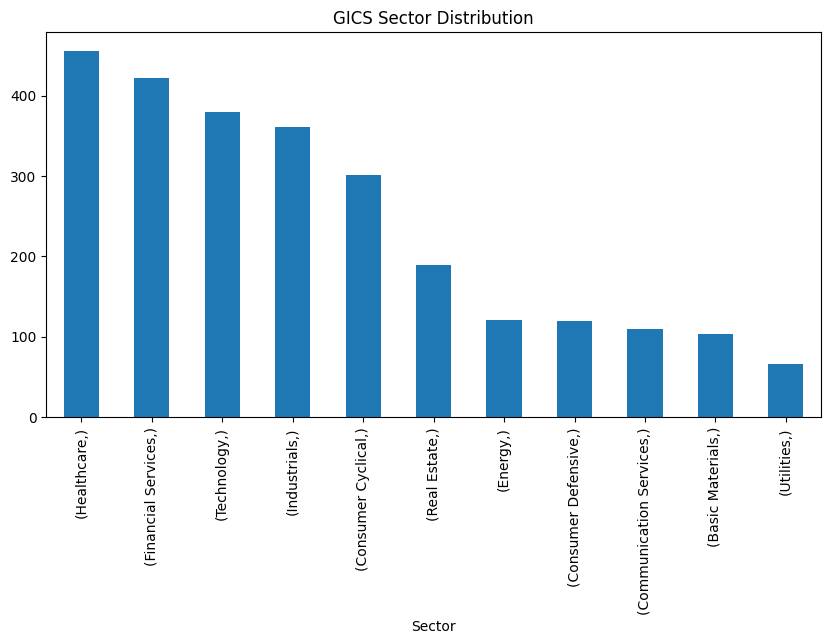

In [14]:
gics_sectors.value_counts().plot(kind='bar', figsize=(10, 5), title="GICS Sector Distribution")